# Per User Analysis

Creates a Pandas DataFrame where each row represents aggregate totals for one user's edits.

In [1]:
import pandas as pd, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, calendar, time
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.ticker
%matplotlib inline

In [2]:
PLACE = "detroit_michigan"

Read in the versions file

In [4]:
header = ["user","road_km_added","road_km_modified","waterway_km_added","waterway_km_modified","roads_added","roads_modified","waterways_added","waterways_modified","buildings_added","buildings_modified","parking_aisle_km_added","parking_aisle_km_modified","parking_aisles_added","parking_aisles_modified","service_road_km_added","service_road_km_modified","service_roads_added","service_roads_modified","driveway_km_added","driveway_km_modified","driveways_added","driveways_modified","sidewalk_km_added","sidewalk_km_modified","sidewalks_added","sidewalks_modified","lane_km_added","lane_km_modified","lanes_added","lanes_modified","cycleway_km_added","cycleway_km_modified","cycleways_added","cycleways_modified","traffic_signs_added","traffic_signs_modified","traffic_signals_added","traffic_signals_modified","manholes_added","manholes_modified","flagpoles_added","flagpoles_modified","bollards_added","bollards_modified","surveillance_added","surveillance_modified","vending_machines_added","vending_machines_modified","pois_added","pois_modified","parks_added","parks_modified","addresses_added","addresses_modified","parking_added","parking_modified","swimming_pools_added","swimming_pools_modified","barriers_added","barriers_modified","bike_parking_added","bike_parking_modified","shelters_added","shelters_modified","crossings_added","crossings_modified",'changesets']
#

In [5]:
df = pd.read_csv('../data/user_stats-'+PLACE+'-20180930.csv',names=header, sep=',',index_col=False)
df.set_index('user',inplace=True)
df.head(2)

,road_km_added,road_km_modified,waterway_km_added,waterway_km_modified,roads_added,roads_modified,waterways_added,waterways_modified,buildings_added,buildings_modified,...,swimming_pools_modified,barriers_added,barriers_modified,bike_parking_added,bike_parking_modified,shelters_added,shelters_modified,crossings_added,crossings_modified,changesets
user,,,,,,,,,,,,,,,,,,,,,
8446891,15.181739,0.078757,0.0,0.0,115,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
4224929,0.624848,0.000000,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df['url'] = df.apply(lambda x: "http://openstreetmap.org/api/0.6/user/{}".format(x.name),axis=1)

In [15]:
sys.stderr.write("Found {:,} users".format( len(df)))

Found 3,346 users

# 1. Kilometers of roads added vs. edited per user

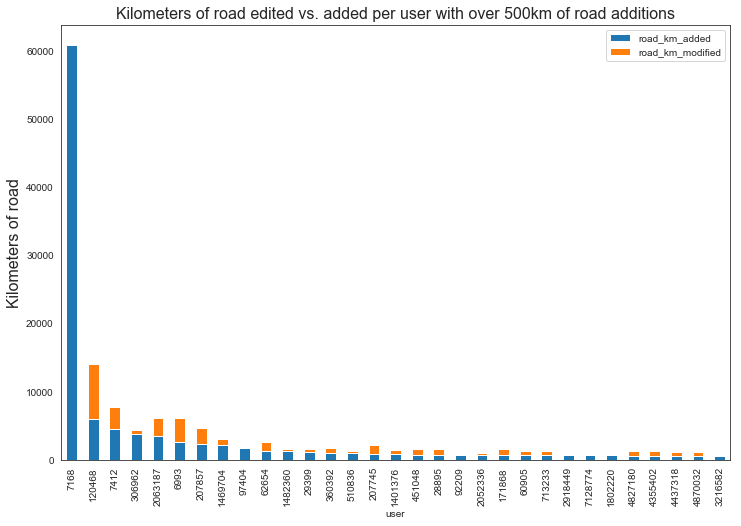

In [16]:
sns.set_style('white')
ax = df[['road_km_added','road_km_modified']].query('road_km_added>500').sort_values(by='road_km_added',ascending=False).plot(kind='bar', stacked=True, figsize=(12,8))
ax.set_ylabel("Kilometers of road",fontsize=16)
ax.set_title("Kilometers of road edited vs. added per user with over 500km of road additions",fontsize=16);
# ax.legend(['Added','Edited'], loc=0, fontsize=12);

# Top contributors?

In [17]:
def top_contributors_for(column):
    return df.sort_values(by=column,ascending=False)[[column,'url']].head()

In [18]:
top_contributors_for('road_km_added')

,road_km_added,url
user,,
7168,60796.461117,http://openstreetmap.org/api/0.6/user/7168
120468,5935.608556,http://openstreetmap.org/api/0.6/user/120468
7412,4543.352774,http://openstreetmap.org/api/0.6/user/7412
306962,3685.277278,http://openstreetmap.org/api/0.6/user/306962
2063187,3515.809689,http://openstreetmap.org/api/0.6/user/2063187


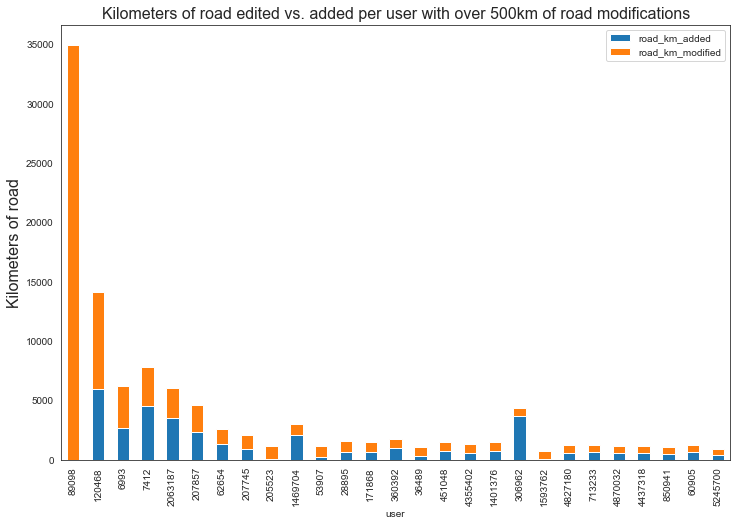

In [9]:
sns.set_style('white')
ax = df[['road_km_added','road_km_modified']].query('road_km_modified>500').sort_values(by='road_km_modified',ascending=False).plot(kind='bar', stacked=True, figsize=(12,8))
ax.set_ylabel("Kilometers of road",fontsize=16)
ax.set_title("Kilometers of road edited vs. added per user with over 500km of road modifications",fontsize=16);
# ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 2 Buildings per user

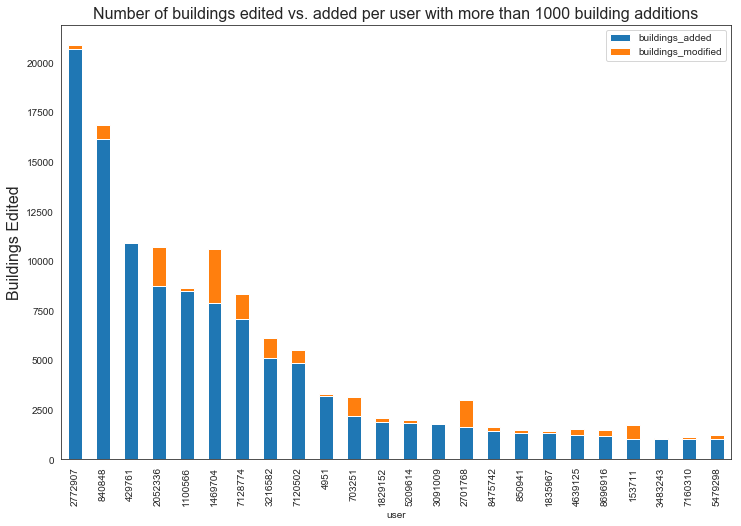

In [10]:
sns.set_style('white')
ax = df[['buildings_added','buildings_modified']].query('buildings_added>1000').sort_values(by='buildings_added',ascending=False).plot(kind='bar',stacked=True,figsize=(12,8))
ax.set_ylabel("Buildings Edited",fontsize=16)
ax.set_title("Number of buildings edited vs. added per user with more than 1000 building additions",fontsize=16);


# 3 What about POIs?

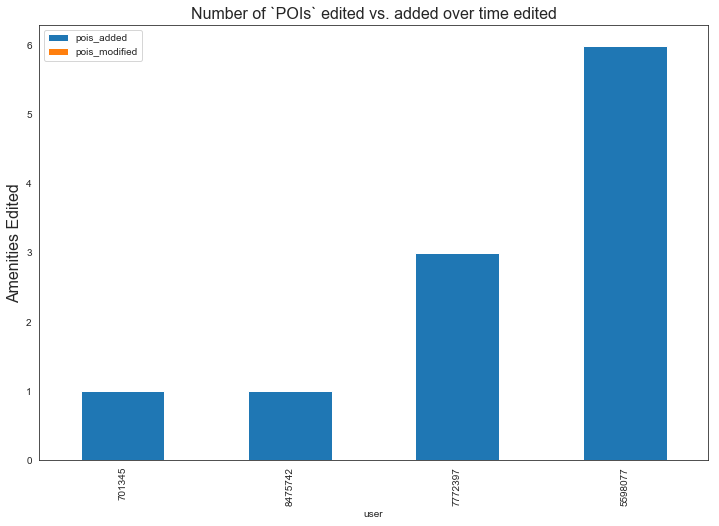

In [23]:
sns.set_style('white')
ax = df[['pois_added','pois_modified']].query('pois_added>0').sort_values(by='pois_added').plot(kind='bar', stacked=True, figsize=(12,8))
ax.set_ylabel("Amenities Edited",fontsize=16)
ax.set_title("Number of `POIs` edited vs. added over time edited",fontsize=16);

# 4. Parks

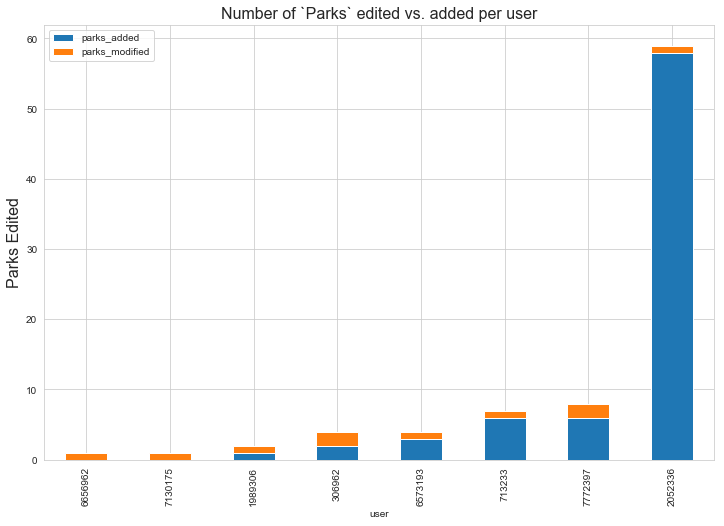

In [30]:
sns.set_style('whitegrid')
ax = df[['parks_added','parks_modified']].query('parks_modified>0').sort_values(by='parks_added').plot(kind='bar',stacked=True,figsize=(12,8))
ax.set_ylabel("Parks Edited",fontsize=16)
ax.set_title("Number of `Parks` edited vs. added per user",fontsize=16);